# 0. Load Packages, Import Data and First Print

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.decomposition import PCA
from scipy.spatial.distance import cosine



In [2]:

# Load the saved arrays
features_train = np.load("/Users/felix/Documents/Data Science/06_Offical_project_DS/may25_bds_plants/05_data/computed_data/2025_06_25_features_train.npy")
labels_train = np.load("/Users/felix/Documents/Data Science/06_Offical_project_DS/may25_bds_plants/05_data/computed_data/2025_06_25_labels_train.npy")


# Load the saved arrays
features_valid = np.load("/Users/felix/Documents/Data Science/06_Offical_project_DS/may25_bds_plants/05_data/computed_data/2025_06_25_features_valid.npy")
labels_valid = np.load("/Users/felix/Documents/Data Science/06_Offical_project_DS/may25_bds_plants/05_data/computed_data/2025_06_25_labels_valid.npy")


# Inspect the data
print("Train Features shape:", features_train.shape )
print("Train Labels shape:", labels_train.shape,"\n")

print("Test Features shape:", features_valid.shape)
print("Test Labels shape:", labels_valid.shape,"\n")

# Print a sample of the data
print("Train Sample feature vector:", features_train[0])
print("Train Sample label:", labels_train[0],"\n")

print("Test Sample feature vector:", features_valid[0])
print("Test Sample label:", labels_valid[0])

Train Features shape: (70295, 1280)
Train Labels shape: (70295,) 

Test Features shape: (17572, 1280)
Test Labels shape: (17572,) 

Train Sample feature vector: [0.         0.86447287 0.23696803 ... 0.25945228 0.80036694 0.5455655 ]
Train Sample label: Apple___Apple_scab 

Test Sample feature vector: [0.         1.9377055  0.         ... 0.         0.33774427 1.586906  ]
Test Sample label: Apple___Apple_scab


# 1. Filter the Data for Heallty Plants

### 1.1 Training Data

In [5]:
# Filter condition: Boolean mask
mask = np.char.endswith(labels_train.astype(str), "healthy")

# Apply mask to features and labels
features_healthy_train = features_train[mask]
labels_healthy_train = labels_train[mask]

# Print a sample of the data
print("Sample feature vector:", features_healthy_train [0])
print("Sample label:", labels_healthy_train [0])
print(np.unique(labels_healthy_train  ))


Sample feature vector: [0.02920142 2.5676873  0.         ... 0.02060599 0.21142866 0.0756085 ]
Sample label: Apple___healthy
['Apple___healthy' 'Blueberry___healthy'
 'Cherry_(including_sour)___healthy' 'Corn_(maize)___healthy'
 'Grape___healthy' 'Peach___healthy' 'Pepper,_bell___healthy'
 'Potato___healthy' 'Raspberry___healthy' 'Soybean___healthy'
 'Strawberry___healthy' 'Tomato___healthy']


### 1.2 Test Data

In [6]:
# Create Boolean mask for labels ending with 'healthy'
mask = np.char.endswith(labels_valid.astype(str), "healthy")

# Apply mask to filter features and labels
features_healthy_valid = features_valid[mask]
labels_healthy_valid = labels_valid[mask]

# Print a sample
print("Sample feature vector:", features_healthy_valid[0])
print("Sample label:", labels_healthy_valid[0])
print("All unique healthy labels:", np.unique(labels_healthy_valid))

Sample feature vector: [0.17777829 2.1144028  0.         ... 1.1448742  0.7059598  1.9669307 ]
Sample label: Apple___healthy
All unique healthy labels: ['Apple___healthy' 'Blueberry___healthy'
 'Cherry_(including_sour)___healthy' 'Corn_(maize)___healthy'
 'Grape___healthy' 'Peach___healthy' 'Pepper,_bell___healthy'
 'Potato___healthy' 'Raspberry___healthy' 'Soybean___healthy'
 'Strawberry___healthy' 'Tomato___healthy']


# 2. Understanding the Feature Vectors

1. Bar chart | See activation pattern of feature vector	
2. PCA / t-SNE / UMAP | 	Explore overall structure, clusters	
3. Cosine/Euclidean similarity	| Compare numerical similarity	
4. GAN inversion | project feature vectors into a GAN’s latent space

### 2.1. Bar chart | See activation pattern of feature vector

In [19]:
# Select 3 random indices
random.seed(42)
random_indices = random.sample(range(features_valid.shape[0]), 3)

# Extract corresponding feature vectors and labels
sample_vectors = features_healthy_train[random_indices]
sample_labels =  labels_healthy_train[random_indices]

for i in range(3):
    print(f"\nSample {i+1} — Label: {sample_labels[i]}")
    print(sample_vectors[i])



Sample 1 — Label: Blueberry___healthy
[0.        2.8349621 0.3107257 ... 1.0803422 0.8075904 0.7381986]

Sample 2 — Label: Apple___healthy
[0.04559413 2.9670522  0.         ... 0.         0.6363455  0.09751659]

Sample 3 — Label: Grape___healthy
[0.         0.45243666 0.09631264 ... 0.9656047  0.2773217  1.2979221 ]


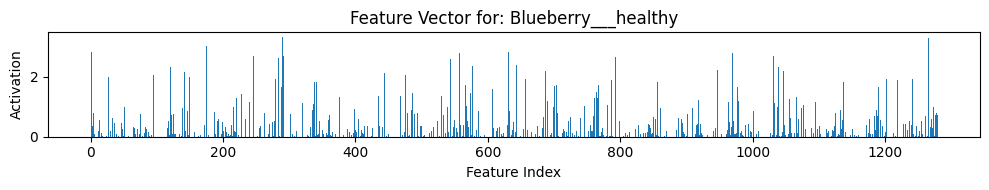

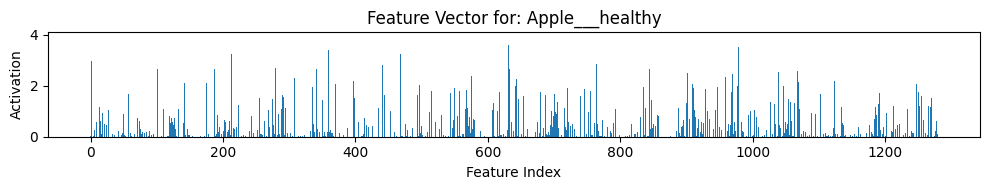

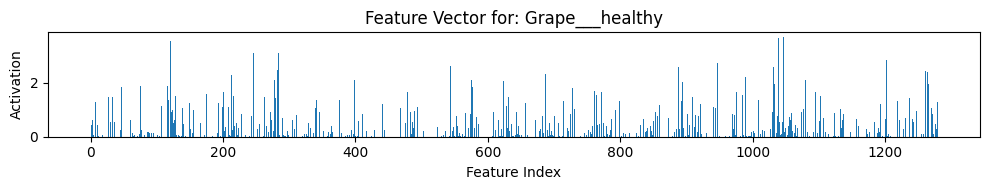

In [20]:
for i in range(3):
    plt.figure(figsize=(10, 2))
    plt.bar(range(len(sample_vectors[i])), sample_vectors[i])
    plt.title(f"Feature Vector for: {sample_labels[i]}")
    plt.xlabel("Feature Index")
    plt.ylabel("Activation")
    plt.tight_layout()
    plt.show()

In [21]:
# Find all indices where the label is "Apple___healthy"
apple_indices = [i for i, 
                 label in enumerate(labels_healthy_train) 
                 if label == "Apple___healthy"]

# Select the first three indices
first_three_apples = apple_indices[:3]

# Extract feature vectors and labels for the first three apples
sample_vectors = features_healthy_train[first_three_apples]
sample_labels = labels_healthy_train[first_three_apples]

for i in range(3):
    print(f"\nSample {i+1} — Label: {sample_labels[i]}")
    print(sample_vectors[i])



Sample 1 — Label: Apple___healthy
[0.02920142 2.5676873  0.         ... 0.02060599 0.21142866 0.0756085 ]

Sample 2 — Label: Apple___healthy
[0.06436551 1.4738588  0.24340655 ... 0.06895679 0.5106721  0.        ]

Sample 3 — Label: Apple___healthy
[0.         1.540369   1.1974416  ... 0.00391393 0.37344712 0.10095001]


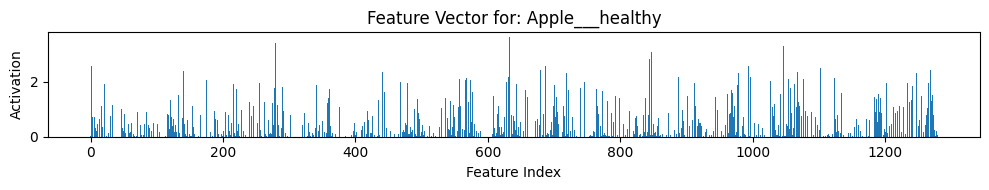

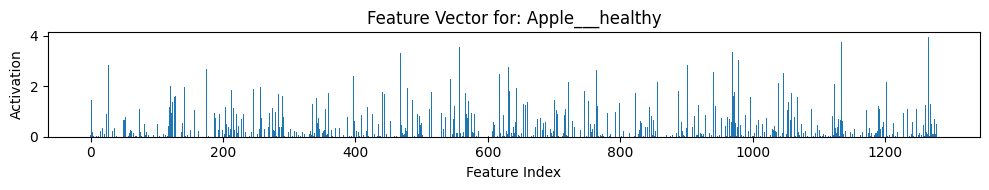

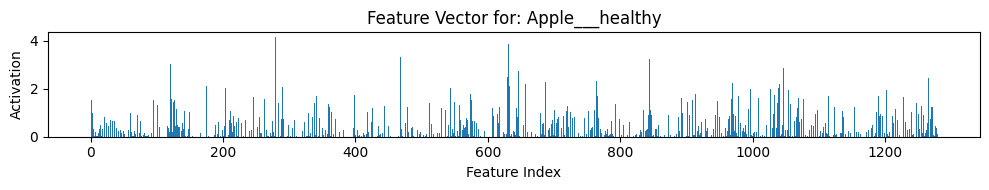

In [ ]:
for i in range(3):
    plt.figure(figsize=(10, 2))
    plt.bar(range(len(sample_vectors[i])), sample_vectors[i])
    plt.title(f"Feature Vector for: {sample_labels[i]}")
    plt.xlabel("Feature Index")
    plt.ylabel("Activation")
    plt.tight_layout()
    plt.show()

### 2.2. PCA / t-SNE / UMAP | 	Explore overall structure, clusters	

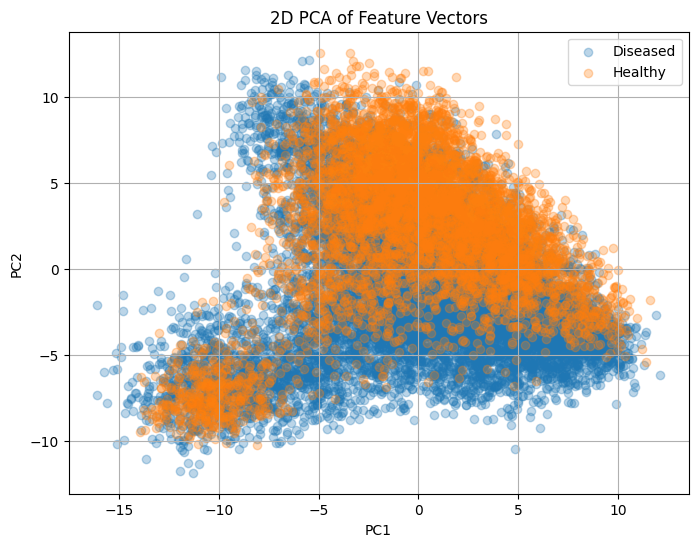

In [ ]:


# Reduce dimensionality for visualization
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_valid)

# Plot (e.g., healthy vs others)
plt.figure(figsize=(8, 6))
mask_healthy = np.char.endswith(labels_valid.astype(str), "healthy")
plt.scatter(features_2d[~mask_healthy, 0], features_2d[~mask_healthy, 1], alpha=0.3, label="Diseased")
plt.scatter(features_2d[mask_healthy, 0], features_2d[mask_healthy, 1], alpha=0.3, label="Healthy")
plt.title("2D PCA of Feature Vectors")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


/var/folders/k_/x6px3sls6sl0yvv6s6pgyqh80000gn/T/ipykernel_8337/1848197281.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


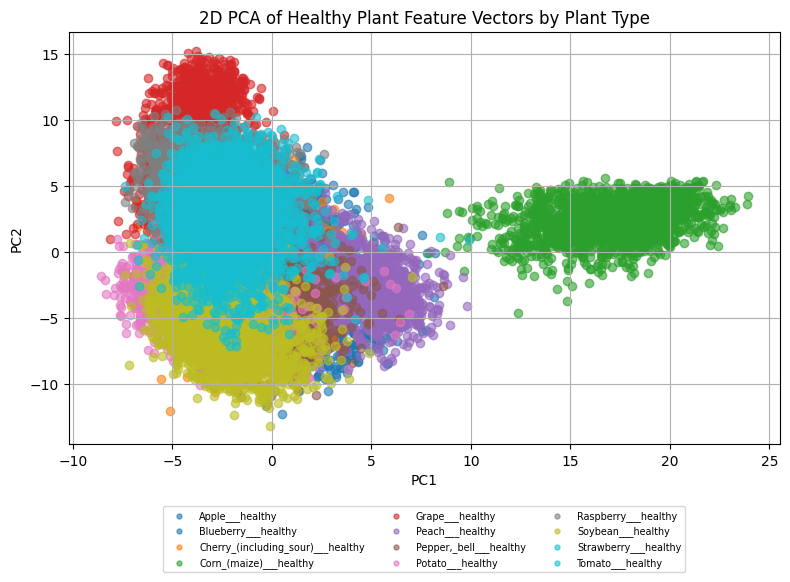

In [24]:
pca = PCA(n_components=2)
features_2d_healthy = pca.fit_transform(features_healthy_train)

unique_labels = np.unique(labels_healthy_train)

plt.figure(figsize=(8, 6))
colors = plt.cm.get_cmap('tab10', len(unique_labels))

for i, label in enumerate(unique_labels):
    mask = labels_healthy_train == label
    plt.scatter(features_2d_healthy[mask, 0], features_2d_healthy[mask, 1],
                alpha=0.6, label=label, color=colors(i))

plt.title("2D PCA of Healthy Plant Feature Vectors by Plant Type")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    fontsize='x-small',
    markerscale=0.6,
    handlelength=2.5,
    handleheight=0.7,
    ncol=3,
    borderaxespad=0.
)
plt.grid(True)
plt.tight_layout()  
plt.show()





### 2.3. Cosine/Euclidean similarity	| Compare numerical similarity	

In [ ]:
d01 = cosine(sample_vectors[0], sample_vectors[1])
d12 = cosine(sample_vectors[1], sample_vectors[2])

print(f"Cosine distance between sample 0 and 1: {d01:.4f}")
print(f"Cosine distance between sample 1 and 2: {d12:.4f}")


#### TBD Compare more plant type of the same plant type and of different plant type

Cosine distance between sample 0 and 1: 0.4134
Cosine distance between sample 1 and 2: 0.5835
